# Star Wars and The Fans

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**  

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool *SurveyMonkey*. They received 835 total responses, which can be downloaded from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In this project, we will be cleaning and exploring the data set.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Read the data into dataframe
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

It seems that `RespondentID` can be missing, let's drop the rows where this data is not available.  
Columns with Yes/No answers could be converted to booleans to ease data analysis.

## Data Cleaning

### Deal Yes/No Values

In [4]:
#Remove NaN IDs
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [5]:
#Convert Yes to True and No to False
yes_no = {'Yes':True, "No":False}
columns_to_boolean = ['Have you seen any of the 6 films in the Star Wars franchise?',
                     'Do you consider yourself to be a fan of the Star Wars film franchise?',
                     'Are you familiar with the Expanded Universe?',
                     'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
                     'Do you consider yourself to be a fan of the Star Trek franchise?']

for col in columns_to_boolean:
    star_wars[col] = star_wars[col].map(yes_no)

The next 6 columns ("Which of the following...") are *checkbox* questions, each one asking if the respondent saw one of the 6 movies in the franchise (for example `Unnamed: 4` - Whether or not the respondent saw **Star Wars: Episode II Attack of the Clones**).  

If the name of the movie is in the cell it means that the respondent saw the movie, if the value is **NaN** it means either that the questions hasn't been replied to or that the movie has not been seen. We will assume that it is the latter.  

It will be better if these columns are renamed and if the values are booleans instead of the movie name, it will then be easier to analyse the data.

### Seen or Not - Towards More Intuitive Columns

In [6]:
#Get column names
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [7]:
#Renaming columns to more intuitive names
col_renaming = {'Which of the following Star Wars films have you seen? Please select all that apply.':"seen_ep_1",
                'Unnamed: 4':"seen_ep_2", 'Unnamed: 5':"seen_ep_3",
                'Unnamed: 6':"seen_ep_4", 'Unnamed: 7':"seen_ep_5",
                'Unnamed: 8':"seen_ep_6"}

star_wars = star_wars.rename(col_renaming, axis=1)

In [8]:
#Replace movie name and NaN with True or False values
movie_to_bool = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

seen_movie = star_wars.columns[3:9]

for col in seen_movie:
    star_wars[col] = star_wars[col].map(movie_to_bool)

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. It would be best if those columns were of numeric type instead of string.

In [9]:
#Convert columns to numeric data type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [10]:
#Rename columns to have more descriptive names
col_renaming_2 = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':"rank_ep_1",
                'Unnamed: 10':"rank_ep_2", 'Unnamed: 11':"rank_ep_3",
                'Unnamed: 12':"rank_ep_4", 'Unnamed: 13':"rank_ep_5",
                'Unnamed: 14':"rank_ep_6"}

star_wars = star_wars.rename(col_renaming_2, axis=1)

## Data Analysis

In [11]:
#Calculate mean ranking score for each movies
mean_ranking = star_wars.iloc[:,9:15].mean()

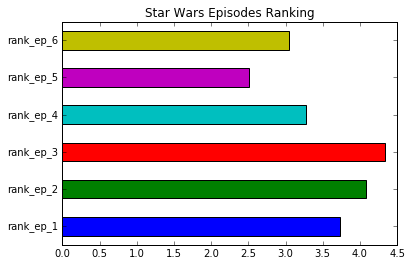

In [12]:
mean_ranking.plot(kind="barh", title="Star Wars Episodes Ranking")

The lower the ranking the better. **Episode 5 "The Empire Strikes Back" has the best mean ranking**. 
However we need to make sure that even tough it got the best ranking, most of the respondent think this movie is the best of the serie.

In [13]:
#See the quantity of persons who saw each movie
seen_episodes = star_wars.iloc[:,3:9].sum()

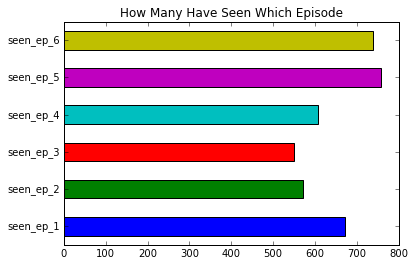

In [14]:
seen_episodes.plot(kind="barh", title="How Many Have Seen Which Episode")

**Episode 5 "The Empire Strikes Back"** is the Star Wars movie which has been seen the most compared to the 5 others.  
Overall, all episodes have been seen by more than 550 persons (average over all movies is 650) and the most seen (Ep. 5) have been watched by 100 persons more than the average.  
Based on those observations we can say that it's ranking is "fair".  

It could be interesting to see how Star Wars fans ranked the movies compared to non fans or if being a fan of another franchise could change the result or, if men and women have a different opinion about it.  
Let's focus on those questions in the next code blocks.

## Categorizing Respondent Population

### Respondent Gender

In [19]:
#Split on Gender column
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

In [23]:
#Same analysis as before on mean rank and number of viewers
males_ranking = males.iloc[:,9:15].mean()
females_ranking = females.iloc[:,9:15].mean()

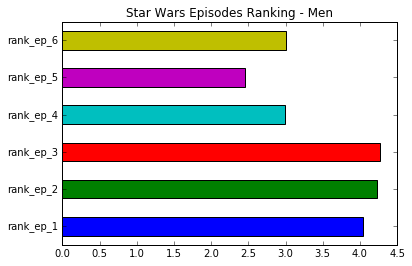

In [24]:
males_ranking.plot(kind="barh", title="Star Wars Episodes Ranking - Men")

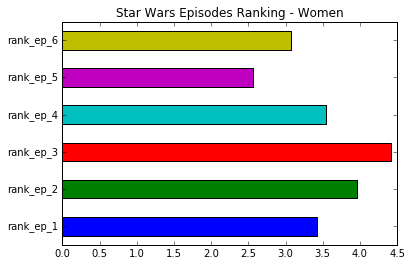

In [25]:
females_ranking.plot(kind="barh", title="Star Wars Episodes Ranking - Women")

Even if we can see that there is a disparity in the rankings between men and women, one thing is for sure : **Episode 5 "The Empire Strikes Back" has the best mean ranking** in both the groups.

In [26]:
seen_episodes_males = males.iloc[:,3:9].sum()
seen_episodes_females = females.iloc[:,3:9].sum()

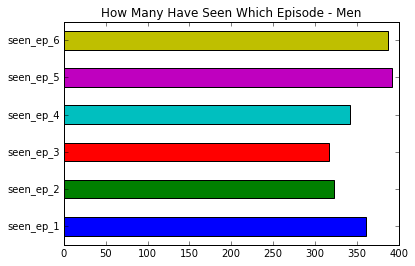

In [29]:
seen_episodes_males.plot(kind="barh", title="How Many Have Seen Which Episode - Men")

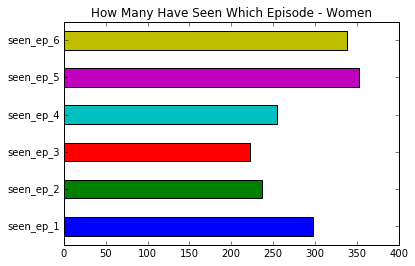

In [30]:
seen_episodes_females.plot(kind="barh", title="How Many Have Seen Which Episode - Women")

Our overall observation is here still verified weither we focus on Men respondent or women ones, **Episode 5 "The Empire Strikes Back" is the Star Wars movie which has been seen the most compared to the 5 others** and we then can be pretty confident about its ranking. 

### Are You A Fan ?

In [32]:
#Split on fan column
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == True]
not_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == False]

In [33]:
#Same analysis as before on mean rank and number of viewers
fans_ranking = fans.iloc[:,9:15].mean()
not_fans_ranking = not_fans.iloc[:,9:15].mean()

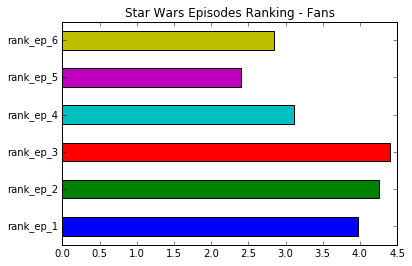

In [35]:
fans_ranking.plot(kind="barh", title="Star Wars Episodes Ranking - Fans")

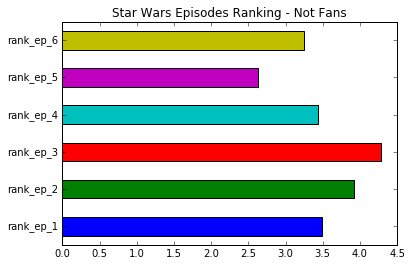

In [36]:
not_fans_ranking.plot(kind="barh", title="Star Wars Episodes Ranking - Not Fans")

It seems that fans and casual viewers tend to agree on the Star Wars movie ranking and with, again, **Episode 5 "The Empire Strikes Back" has the best mean ranking**.

In [37]:
seen_episodes_fans = fans.iloc[:,3:9].sum()
seen_episodes_not_fans = not_fans.iloc[:,3:9].sum()

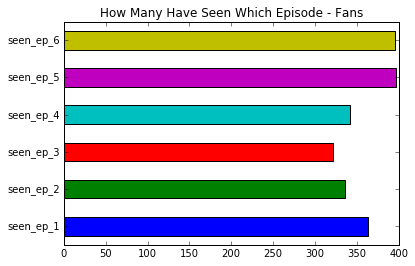

In [38]:
seen_episodes_fans.plot(kind="barh", title="How Many Have Seen Which Episode - Fans")

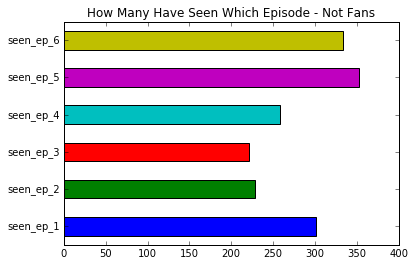

In [39]:
seen_episodes_not_fans.plot(kind="barh", title="How Many Have Seen Which Episode - Not Fans")

**Episode 5** is still the most viewed. One interesting thing to note is that fans are watching all the movies of the series whereas non fans focus on the last 2 episodes the others watched almost 200 times less (maybe encouraged by fans to watch those if there was only one to watch in a lifetime). 

# Conclusion

After this primary analysis we can say with a relatively high confidence that **Episode V : The Empire Strikes Back** is considered to be the best Star Wars movie by the majority of viewers weither they are fans or new to the mythology. 